## 平面ラプラス分布の再現
「Geo-indistinguishability: Differential Privacy for Location-Based Systems」より，Figure2の再現を行う．\
確率分布関数に関するグラフの描画を実施する．

In [1]:
# モジュールを追加する
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
# 使用する変数の宣言
# 今回は実際の位置を(-2,-4),(5,3)とする
real_x1 = -2.0
real_y1 = -4.0

real_x2 = 5.0
real_y2 = 3.0

# epsilonの値の設定
epsilon = 0.2

# 正規化係数C
C = epsilon**2 / (2 * np.pi)

In [3]:
# ユークリッド距離を計算する関数の定義
def d(real_x, real_y, fake_x, fake_y):
    return np.sqrt( (real_x - fake_x)**2 + (real_y - fake_y)**2 )

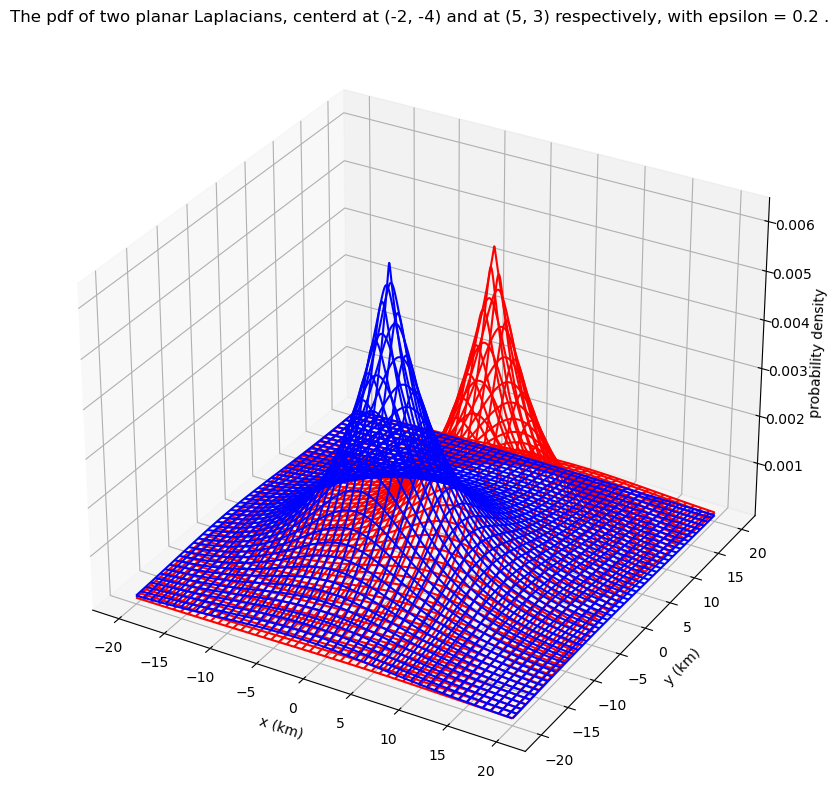

In [5]:
# 確率分布関数の定義と３次元グラフの描画設定
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection="3d")

# 格子点の作成
x = np.linspace(-20, 20, 1024)
y = np.linspace(-20, 20, 1024)

X, Y = np.meshgrid(x, y)

# 各位置ごとの確率密度関数を定義する
Z1 = C * np.e**( - epsilon * d(real_x1, real_y1, X, Y) )
Z2 = C * np.e**( - epsilon * d(real_x2, real_y2, X, Y) )

# ２つのグラフを描画する
ax.plot_wireframe(X, Y, Z1, color="blue")
ax.plot_wireframe(X, Y, Z2, color="red")
ax.set_xlabel("x (km)")
ax.set_ylabel("y (km)")
ax.set_zlabel("probability density")
plt.title("The pdf of two planar Laplacians, centerd at (-2, -4) and at (5, 3) respectively, with epsilon = 0.2 .")
plt.savefig("pdf_Laplacians.jpg", dpi=120)
plt.show()